In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import MaxPool2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Dense
from skimage.io import imread
from skimage.transform import resize
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image
from keras.models import load_model
import random
import pickle
import numpy as np
from PIL import Image
from keras.preprocessing import image
import sklearn.metrics as metrics
from keras.callbacks import CSVLogger


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def add_noise(img):
    '''Add random noise to an image'''
    VARIABILITY = 50
    deviation = VARIABILITY*random.random()
    noise = np.random.normal(0, deviation, img.shape)
    img += noise
    return img

In [ ]:
#Setting the parameters
IMG_HEIGHT = 100
IMG_WIDTH = 100
BATCH_SIZE = 32
dir = os.listdir('/content/drive/MyDrive/train')
print(dir)
dir = os.listdir('/content/drive/MyDrive/test')
print(dir)
filepath = ('/content/drive/MyDrive/train') 
#os.rmdir('/content/drive/MyDrive/train/.ipynb_checkpoints')
DIR = '/content/drive/MyDrive/train'
DIRR='/content/drive/MyDrive/test'



#Image augmentation
training_data = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   rotation_range=2,
                                   width_shift_range=0.05,
                                   height_shift_range=0.05,
                                   brightness_range=(0,0.9), # tuple variable
                                   shear_range=0.05,
                                   zoom_range=0.05)

test_datagen = ImageDataGenerator(rescale=1./255)
#Training data generator
train_generator = training_data.flow_from_directory(DIR,
                                                  target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                  batch_size=BATCH_SIZE,
                                                  color_mode="grayscale",
                                                  class_mode='categorical',
                                                  subset="training")

#Validation data generator
validation_generator =training_data.flow_from_directory(DIR,
                                                         target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                         batch_size=BATCH_SIZE,
                                                         class_mode='categorical',
                                                         color_mode="grayscale",
                                                         subset='validation')

['fake', 'real']
['fake', 'real']
Found 1633 images belonging to 2 classes.
Found 408 images belonging to 2 classes.


In [ ]:
prediction_generator = test_datagen.flow_from_directory(DIRR,
                                                         target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                         batch_size=BATCH_SIZE,
                                                         class_mode='categorical',
                                                         color_mode="grayscale",
                                                         subset='training')


Found 200 images belonging to 2 classes.


In [ ]:
# CNN -1 

csv_logger = CSVLogger('/content/drive/MyDrive/cnn1.log', separator=',', append=False)

model = Sequential()

model.add(Conv2D(128,(3, 3), activation='relu', padding="same", input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='RMSProp', metrics=['accuracy'])
model.fit(train_generator, verbose=1, validation_data = validation_generator, epochs=150,callbacks=[csv_logger])
filename = '/content/drive/MyDrive/cnn1.sav'
pickle.dump(model, open(filename, 'wb'))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 100, 100, 128)     1280      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 50, 50, 128)      0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 320000)            0         
                                                                 
 dense_4 (Dense)             (None, 512)               163840512 
                                                                 
 dense_5 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 163,842,818
Trainable params: 163,842,818
Non-trainable params: 0
________________________________________

In [ ]:
filename = '/content/drive/MyDrive/cnn1.sav'
pickle.dump(model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://5b2b2bf5-771c-4811-ba86-2c15ea3bb031/assets


     epoch  accuracy      loss  val_accuracy  val_loss
0        0  0.493570  3.269150      0.517157  0.705192
1        1  0.542560  0.705857      0.526961  0.691783
2        2  0.557869  0.697694      0.561275  0.689942
3        3  0.577465  0.680598      0.514706  0.704124
4        4  0.573178  0.686986      0.566176  0.689403
..     ...       ...       ...           ...       ...
145    145  0.741580  0.514653      0.549020  0.895134
146    146  0.753827  0.517715      0.546569  0.977463
147    147  0.745866  0.497238      0.556373  0.934533
148    148  0.737293  0.518108      0.524510  0.958112
149    149  0.737293  0.541121      0.551471  0.970567

[150 rows x 5 columns]


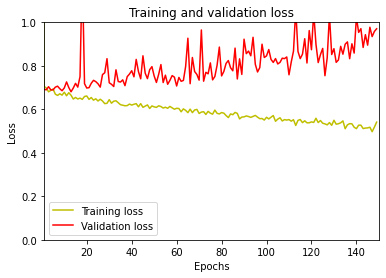

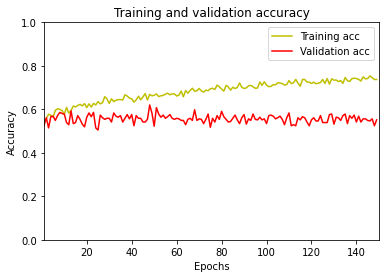

In [ ]:

log_data = pd.read_csv('/content/drive/MyDrive/cnn1.log', sep=',', engine='python')
print(log_data)

epochs =log_data.epoch
loss=log_data.loss
val_loss=log_data.val_loss
acc=log_data.accuracy
val_acc=log_data.val_accuracy

plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlim(1,150)
plt.ylim(0,1)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlim(1,150)
plt.ylim(0,1)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [ ]:
filename = '/content/drive/MyDrive/cnn1.sav'
test_steps_per_epoch = np.math.ceil(prediction_generator.samples / prediction_generator.batch_size)
loaded_model = pickle.load(open(filename, 'rb'))
predictions = loaded_model.predict(prediction_generator,test_steps_per_epoch)
# Get most likely class
predictions = np.argmax(predictions, axis=1)
true_classes = prediction_generator.classes
print(true_classes)
class_labels = list(prediction_generator.class_indices.keys())
#print(class_labels)
report = metrics.classification_report(true_classes, predictions, target_names=class_labels)
print(report)
confusion_matrix = metrics.confusion_matrix(true_classes, predictions)  # shape=(12, 12)
print(confusion_matrix)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
              precision    recall  f1-score   support

        fake       0.45      0.40      0.43       100
        real       0.46      0.52      0.49       100

    accuracy                           0.46       200
   macro avg       0.46      0.46      0.46       200
weighted avg       0.46      0.46      0.46       200

[[40 60]
 [48 52]]


In [ ]:
#CNN - 2

csv_logger = CSVLogger('/content/drive/MyDrive/cnn2.log', separator=',', append=False)
model = Sequential()
model.add(Conv2D(64,(3, 3), activation='relu', padding="same", input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64,(3, 3), activation='relu', padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='RMSProp', metrics=['accuracy'])
model.fit(train_generator, verbose=1, validation_data = validation_generator, epochs=150,callbacks=[csv_logger])

filename = '/content/drive/MyDrive/cnn2.sav'
pickle.dump(model, open(filename, 'wb'))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 100, 100, 64)      640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 40000)             0         
                                                                 
 dense_6 (Dense)             (None, 512)              

     epoch  accuracy      loss  val_accuracy  val_loss
0        0  0.522964  0.809900      0.529412  0.694859
1        1  0.525413  0.714538      0.517157  0.693657
2        2  0.548071  0.689745      0.524510  0.748950
3        3  0.563380  0.698103      0.544118  0.691678
4        4  0.583588  0.689012      0.517157  0.702986
..     ...       ...       ...           ...       ...
145    145  0.783221  0.454908      0.529412  1.036333
146    146  0.769749  0.503515      0.539216  1.023142
147    147  0.778322  0.465247      0.553922  1.073275
148    148  0.776485  0.477614      0.575980  0.943950
149    149  0.782609  0.449848      0.571078  0.923833

[150 rows x 5 columns]


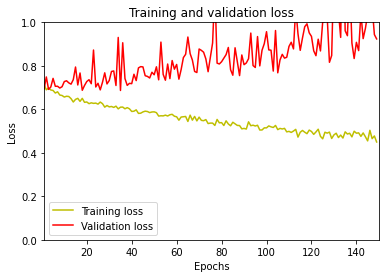

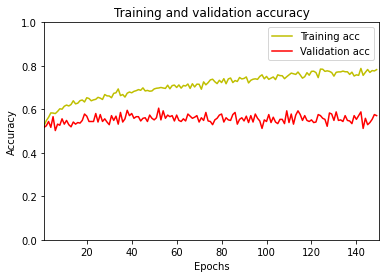

In [ ]:

log_data = pd.read_csv('/content/drive/MyDrive/cnn2.log', sep=',', engine='python')
print(log_data)

epochs =log_data.epoch
loss=log_data.loss
val_loss=log_data.val_loss
acc=log_data.accuracy
val_acc=log_data.val_accuracy

plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlim(1,150)
plt.ylim(0,1)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlim(1,150)
plt.ylim(0,1)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [ ]:
filename='/content/drive/MyDrive/cnn2.sav'
test_steps_per_epoch = np.math.ceil(prediction_generator.samples / prediction_generator.batch_size)
loaded_model = pickle.load(open(filename, 'rb'))
predictions = loaded_model.predict(prediction_generator,test_steps_per_epoch)
# Get most likely class
predictions = np.argmax(predictions, axis=1)
true_classes = prediction_generator.classes
print(true_classes)
class_labels = list(prediction_generator.class_indices.keys())
#print(class_labels)
report = metrics.classification_report(true_classes, predictions, target_names=class_labels)
print(report)
confusion_matrix = metrics.confusion_matrix(true_classes, predictions)  # shape=(12, 12)
print(confusion_matrix)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
              precision    recall  f1-score   support

        fake       0.46      0.53      0.49       100
        real       0.45      0.38      0.41       100

    accuracy                           0.46       200
   macro avg       0.45      0.46      0.45       200
weighted avg       0.45      0.46      0.45       200

[[53 47]
 [62 38]]
